# Question 2

In [34]:
from scipy.optimize import fsolve
import numpy as np
import matplotlib.pyplot as plt

### First, we will approximate the stable states in question, at some a>1

In [35]:
# This function represents the steady state condition ax - sum(x^(2k-1)/(2k-1))
def f(x, a):
    # We will approximate the sum by taking the first 10 terms (results do not change much after that point, 1e-3 order)
    series_sum = sum([x**(2*k - 1) / (2*k - 1) for k in range(1, 10)])
    return a*x - series_sum

# We will solve for a > 1, let's choose a = 1.5 for example
a = 1.5

# We find the roots of the function at other steady states.
# We expect other solutions to be near +/-1, so we will use +/-0.9 as initial guesses.
x_guesses = [-0.9, 0.9]

# Calculate the roots using fsolve
steady_states = fsolve(f, x_guesses, args=(a,))
print(steady_states)

[-0.86284098  0.86284098]


### Now we will find steady states for the range of values

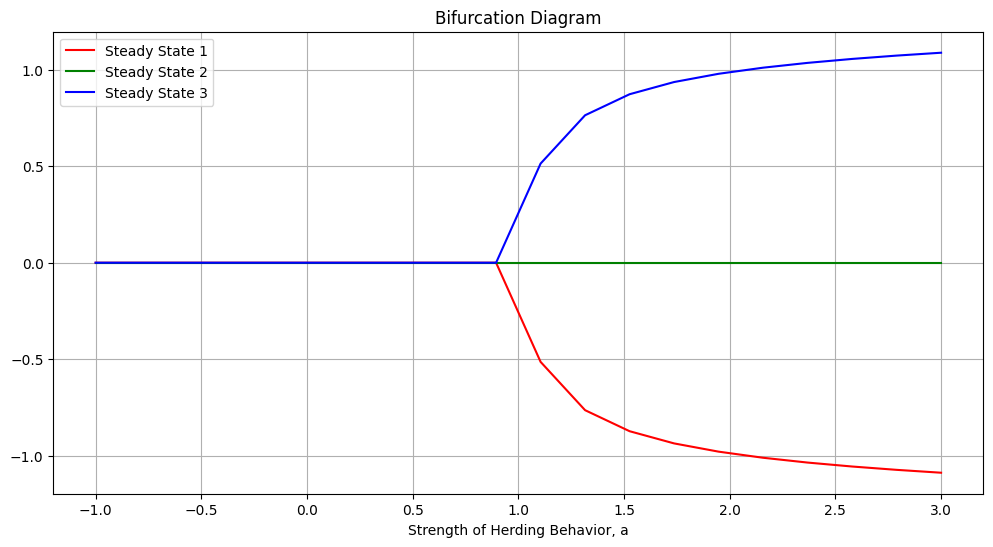

In [36]:
# Define a range of 'a' values
a_values = np.linspace(-1.0, 3, 20)

# Function to calculate the steady states for a given 'a'
def find_steady_states(a):
    # We take same guesses, but also include the known point x=0
    x_guesses = np.array([-0.9, 0.0, 0.9])
    # Find the roots using fsolve and return them
    return fsolve(f, x_guesses, args=(a))

# Calculate steady states for each 'a'
steady_states_over_a = np.array([find_steady_states(a) for a in a_values])

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(a_values, steady_states_over_a[:, 0], 'r-', label='Steady State 1')
plt.plot(a_values, steady_states_over_a[:, 1], 'g-', label='Steady State 2')
plt.plot(a_values, steady_states_over_a[:, 2], 'b-', label='Steady State 3')
plt.title('Steady States of x for a=[-1, 3]')
plt.xlabel('Strength of Herding Behavior, a')
plt.title('Bifurcation Diagram')
plt.legend()
plt.grid(True)
plt.show()


### Now we will determine if steady states are stable or unstable

To do so, we need to make our functions more clear and to find a second derivative.

c:\Users\pmchrist\.conda\envs\ABM\lib\site-packages\scipy\optimize\_minpack_py.py:178: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


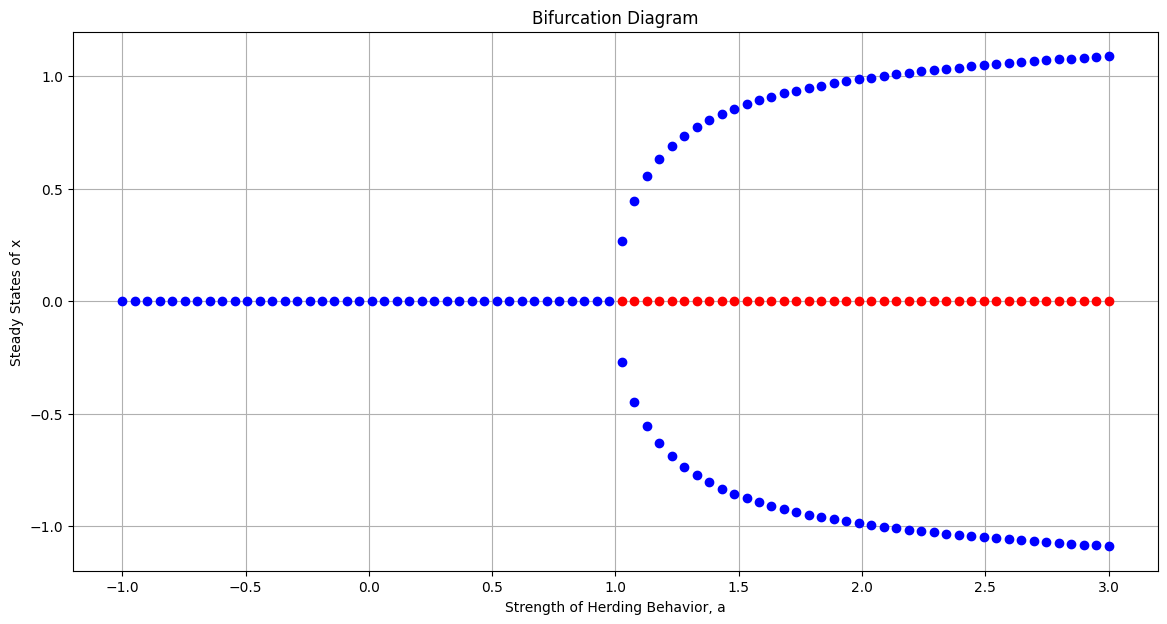

In [37]:
# Function to find the original Sum
def series_sum(x):
    return sum([x**(2*k - 1) / (2*k - 1) for k in range(1, 10)])

# Evolution function with the series sum
def f(x, a):
    return a*x - series_sum(x)

# Function to find the Sum for derivative
def series_derivative_sum(x):
    return sum([(2*k - 1) * x**(2*(k - 1)) for k in range(1, 10)])

# Function for the derivative of f with respect to x
def df_dx(x, a):
    return a - series_derivative_sum(x)

# This function finds unique roots for the given x and a
def find_steady_states(a, x_guesses):
    roots = fsolve(f, x_guesses, args=(a))
    roots = np.unique(np.round(roots, decimals=5))  # Filter out duplicate roots
    return roots

# Function to test the stability of the steady states
def test_stability(a, steady_states):
    stability = []
    for x in steady_states:
        # Evaluate the second derivative at the steady state
        derivative_at_x = df_dx(x, a)
        # If the derivative is negative, the steady state is stable
        if derivative_at_x < 0:
            stability.append('Stable')
        # If the derivative is positive, the steady state is unstable
        elif derivative_at_x > 0:
            stability.append('Unstable')
        # If the derivative is zero, it hass a higher-order behavior
        else:
            stability.append('Other')
    return stability

# Defining a range of 'a' values and initial guesses for 'x'
a_values_reduced = np.linspace(-1.0, 3.0, 80)
x_guesses = np.linspace(-1.0, 1.0, 3)

# Initialize dictionaries to store the steady states and their stability for each 'a' value
steady_states_over_a = {}
stability_over_a = {}

# Calculate steady states and their stability for each 'a'
for a in a_values_reduced:
    # Find steady states
    steady_states = find_steady_states(a, x_guesses)
    steady_states_over_a[a] = steady_states
    # Test stability of each steady state
    stability_over_a[a] = test_stability(a, steady_states)

# Prepare to plot the bifurcation diagram with stability
plt.figure(figsize=(14, 7))

# We should also divide points for the next graph
stable_points = []
unstable_points = []

# Plot the steady states with their stability for each 'a'
for a in a_values_reduced:
    for x, stability in zip(steady_states_over_a[a], stability_over_a[a]):
        if stability =='Other':
            print("Other", x, stability)
        elif stability == 'Stable':
            stable_points.append([a,x])
            plt.plot(a, x, 'ob')  # Blue for stable
        else:
            unstable_points.append([a,x])
            plt.plot(a, x, 'or')  # Red for unstable

# Saving found points for further visualization
stable_points = np.array(stable_points)
unstable_points = np.array(unstable_points)

# Outputing sketch of Bifurcation Diagram
plt.title('Bifurcation Diagram')
plt.xlabel('Strength of Herding Behavior, a')
plt.ylabel('Steady States of x')
plt.grid(True)
plt.show()


### Final Bifurcation Diagram with States Classified and Combined

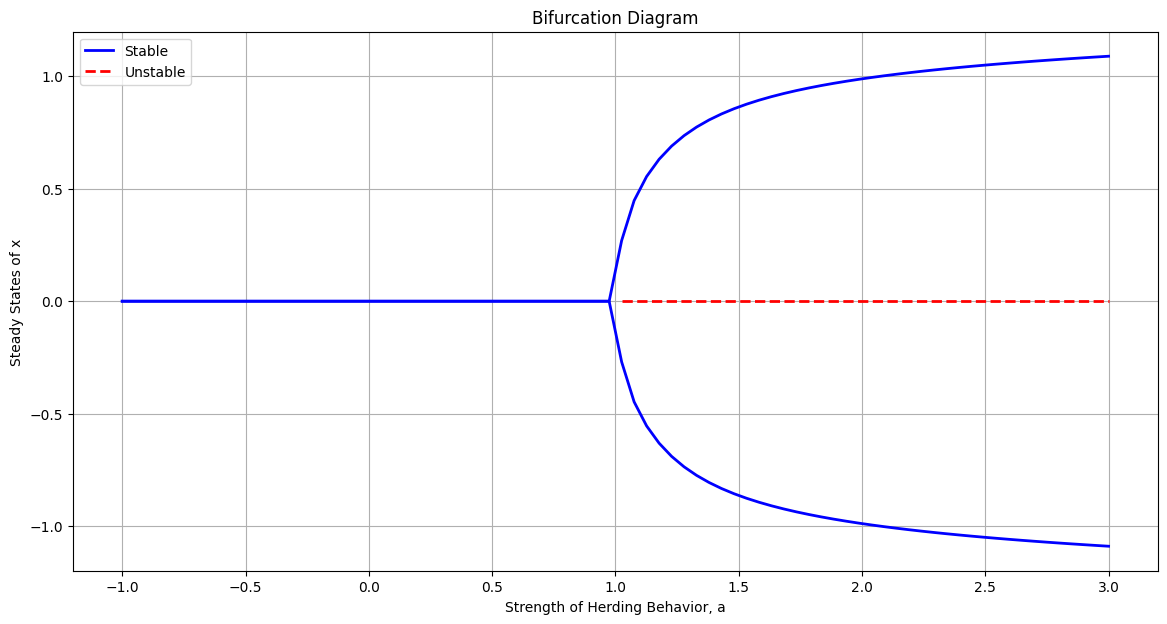

In [38]:
# Plotting
plt.figure(figsize=(14, 7))
if len(stable_points) > 0:
    a = stable_points[np.where(stable_points[:, 1]>=0), 0].flatten()
    x = stable_points[np.where(stable_points[:, 1]>=0), 1].flatten()
    plt.plot(a, x, 'b', label='Stable', linewidth=2)
if len(stable_points) > 0:
    a = stable_points[np.where(stable_points[:, 1]<=0), 0].flatten()
    x = stable_points[np.where(stable_points[:, 1]<=0), 1].flatten()
    plt.plot(a, x, 'b', linewidth=2)
if len(unstable_points) > 0:
    plt.plot(unstable_points[:, 0], unstable_points[:, 1], 'r--', label='Unstable', linewidth=2)
plt.title('Bifurcation Diagram')
plt.xlabel('Strength of Herding Behavior, a')
plt.ylabel('Steady States of x')
plt.legend()
plt.grid(True)
plt.show()